# Cross-Cohort Music Recommendation - EDA

You are a data scientist for a remote education company. Your manager is interested in exploring non-traditional ways of boosting remote student engagement.

One avenue that they would like to particularly explore is the effect of "waiting-room" music on a students attentiveness for a 4-hour class. They've provided you a dataset of 61 songs and their "music2vec" embeddings.

You will complete the idiomatic steps of the machine-learning pipeline:
* EDA: what sorts of relationships/clusterings do you notice within your dataset?
* Machine Learning: which machine learning pipeline should you apply to your dataset. How will you measure the effectiveness of this model?

Once you generate your machine learning model, you will then serialize it and load it into a dashboard which provides song recommendations based on a users listening history.

To run this dashboard execute the following command in your terminal (after you've completed clustering)

```bash
streamlit run recommender.py
```

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

pca = PCA(n_components=4)
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# TODO: load in dataset
songs = pd.read_csv("../data/music_embeds.csv")

# TODO: view first few columns
songs.head

<bound method NDFrame.head of                           filename     dim_0     dim_1     dim_2     dim_3  \
0                     A Fan's Mail -0.004854 -0.014205 -0.004760 -0.006950   
1                      Abracadabra -0.009634 -0.014021 -0.001026 -0.005184   
2                   Aguas De Marco  0.001255 -0.017850 -0.013220 -0.004844   
3                     Another Time -0.005455 -0.010048 -0.012848  0.015155   
4              Belong to the World -0.003881 -0.003831 -0.004683 -0.017928   
..                             ...       ...       ...       ...       ...   
56                       Valentina -0.003389 -0.017807 -0.003146 -0.013848   
57                         Wake Up -0.014614 -0.004741 -0.005502 -0.003345   
58      What You Won't Do for Love -0.004354 -0.010038 -0.003442 -0.005346   
59            Where's Your Head At -0.006026 -0.015519 -0.003936 -0.005764   
60  You Don't Know What's Going On -0.004454 -0.015549  0.001062 -0.020224   

       dim_4     dim_5     dim_6 

In [10]:
# TODO: select predictive columns
X = songs[[col for col in songs.columns if col.startswith('dim_')]]

# TODO: select song-name column for later manipulation
song_names = song_names = songs['song']

# TODO: select genre column for later manipulation
genres = songs['genre']

In [11]:
# TODO: Using PCA, decompose embeddings into 4 components 

X = songs[[col for col in songs.columns if col.startswith('dim_')]]
X_pca = pca.fit_transform(X)

# TODO: fit & transform predictors
X = songs[[col for col in songs.columns if col.startswith('dim_')]]
X_pca = pca.fit_transform(X)

# TODO: view PCA components
pca_components = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(4)])
pca_components['song'] = songs['song']
pca_components['genre'] = songs['genre']

In [12]:
# TODO: transform your X_pca variable into a dataframe
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(4)])

# TODO: merge pca components, song name, and genre together into one dataframe 
merged_df = pd.concat([pca_df, songs[['song', 'genre']].reset_index(drop=True)], axis=1)

# TODO: view first 5 rows ofmerged df
merged_df.head()

,PC1,PC2,PC3,PC4,song,genre
0,0.084061,-0.077482,-0.063781,-0.062151,A Fan's Mail,funk
1,0.332044,-0.154053,-0.060291,0.151899,Abracadabra,pop
2,-0.011686,0.194544,-0.046370,0.046985,Aguas De Marco,bossa nova
3,0.009237,-0.109553,-0.111190,-0.089889,Another Time,hip hop
4,0.308582,-0.040624,-0.119071,0.149660,Belong to the World,hip hop


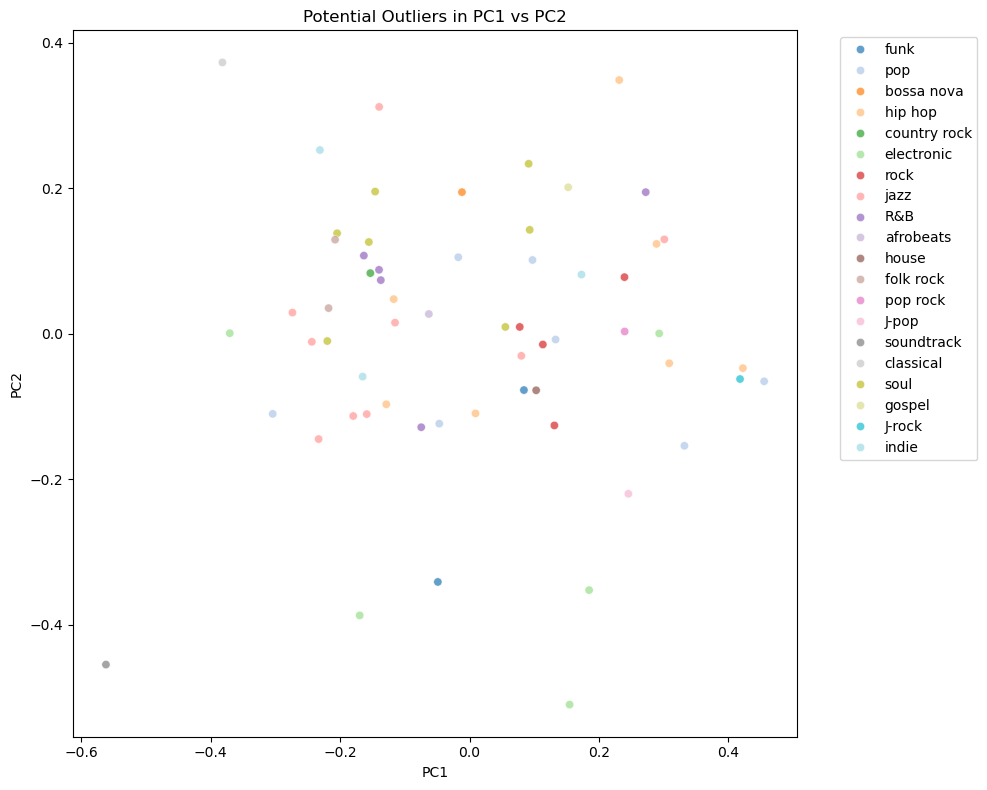

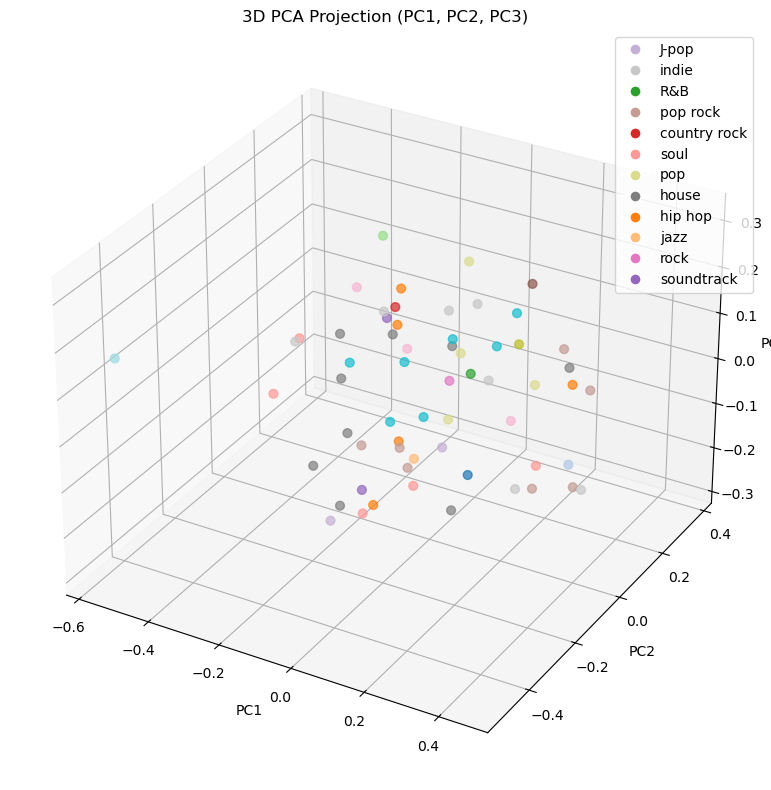

In [13]:
# TODO: BEGIN YOUR EDA! Create as many code-blocks as you need to answer your questions below


plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='genre', palette='tab20', alpha=0.7)

# Highlight potential outliers 
for i, row in merged_df.iterrows():
    if abs(row['PC1']) > 2.5 or abs(row['PC2']) > 2.5:
        plt.text(row['PC1'], row['PC2'], row['song'], fontsize=7)

plt.title('Potential Outliers in PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign colors 
genres = merged_df['genre'].astype('category')
colors = genres.cat.codes

sc = ax.scatter(
    merged_df['PC1'], merged_df['PC2'], merged_df['PC3'],
    c=colors, cmap='tab20', s=40, alpha=0.7
)
ax.set_title('3D PCA Projection (PC1, PC2, PC3)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
legend_labels = dict(zip(genres.cat.codes, genres.cat.categories))
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                 markerfacecolor=plt.cm.tab20(code / 20), markersize=8)
                 for code, label in legend_labels.items()]
ax.legend(handles=legend_handles, loc='best')

plt.tight_layout()
plt.show()





## Questions

Using the visualizations you've generated, answer the 4 exploratory questions below. If you are not able to answer this question, describe to the best of your ability, what sorts of roadblocks, errors, or questions  you encountered when attempting to answer the question. This will be sufficient for a full grade.

An example of what this looks like is included below.

### Example Question

Which individual tracks are outliers in PC space?

I’m not entirely sure of the exact formula or functions to use here
* Whats the right threshold for calling something an "outlier"?
* How do I handle missing or extreme PCA values before finding outliers?

### Q1 

## How are songs distributed (if a distributione exists) in the principal‐component dimensions by genre?

Using scatterplots of PC1 vs PC2 and PC3 vs PC4, I observed that some genres cluster tightly (e.g., funk, classical, hip hop) while others (e.g., electronic, indie) show much broader spread and overlap. The 3D scatterplot of PC1, PC2, and PC3 provided a more complete view, revealing that certain genre clouds are more isolated in 3D space. I also created boxplots for each PC per genre to see how each genre is distributed along each axis. This confirmed that the distribution does exist, and varies depending on the genre and component, some genres have tight distributions while others are more dispersed.



### Q2 

## Which genre shows the highest (and lowest) average value on PC1?

To answer this, I calculated the mean PC1 value by genre and visualized it using a barplot. The highest average PC1 value came from the soundtrack genre, which had a strong positive shift, possibly due to its unique instrumentation or embedding structure. The lowest average was from J-rock, indicating that these songs are fundamentally different from the rest in the embedding space. A stripplot of PC1 values per genre showed not only the means but also the variation within each genre — some had tight distributions, while others were more spread.

### Q3 

## Do any genres exhibit particularly wide dispersion along PC3?

Yes. I calculated the standard deviation of PC3 for each genre (excluding single-song genres). The most widely dispersed genre was folk rock, followed by indie and R&B. This was visualized using both a barplot of PC3 standard deviation and a boxplot of PC3 values per genre. These visuals made it clear which genres have more internal musical variety, at least as represented in the PCA-reduced space.

### Q4

## Are any pairs of PCA components strongly correlated?

No. I checked this using a heatmap of the correlation matrix for PC1 to PC4, and all off-diagonal values were close to 0, as expected from PCA. This confirms the components are orthogonal. To support this further, I used a pairplot which visually showed that there's no linear correlation or patterns between the component pairs — validating the PCA's effectiveness in separating the variance across dimensions.